<h1 align="center">SpaCy Tutorial from SpaCy Team</h1>

## Chapter 1: Finding words, phrases, names and concepts
https://course.spacy.io/en/chapter1

### 1: Introduction to spaCy

In [1]:
# Import the English language class
from spacy.lang.en import English

In [2]:
# Create the nlp object
nlp = English()

#### The Doc object

In [3]:
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")
doc.text

'Hello world!'

#### The Token object

In [4]:
# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

Hello
world
!


In [5]:
# Index into the Doc to get a single token
token = doc[1]
print(token.text)

world


#### The span object

In [6]:
# A slice from the Doc is a Span object
span = doc[1:3]

In [7]:
# Get the span text via the .text attribute
print(span.text)

world!


#### Lexical Attributes

In [8]:
doc = nlp("It costs $5.")

In [9]:
print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

Index:    [0, 1, 2, 3, 4]
Text:     ['It', 'costs', '$', '5', '.']


In [10]:
print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


### 2: Getting Started
Let’s get started and try out spaCy!<br>
In this exercise, you’ll be able to try out some of the 55+ available languages.

#### Part 1: English
---
Import the English class from spacy.lang.en and create the nlp object.<br>
Create a doc and print its text.

In [11]:
# Import the English language class
from spacy.lang.en import English

In [12]:
# Create the nlp object
nlp = English()

In [13]:
# Process a text
doc = nlp("This is a sentence.")

In [14]:
# Print the document text
print(doc.text)

This is a sentence.


#### Part 2: German
---
Import the German class from spacy.lang.de and create the nlp object.<br>
Create a doc and print its text.

In [15]:
# Import the German language class
from spacy.lang.de import German

In [16]:
# Create the nlp object
nlp = German()

In [17]:
# Process a text (this is German for: "Kind regards!")
doc = nlp("Liebe Grüße!")

In [18]:
# Print the document text
print(doc.text)

Liebe Grüße!


#### Part 3: Spanish

In [19]:
# Import the Spanish language class
from spacy.lang.es import Spanish

In [20]:
# Process a text (this is Spanish for: "How are you?")
doc = nlp("¿Cómo estás?")

In [21]:
# Print the document text
print(doc.text)

¿Cómo estás?


### 3: Documents, spands and tokens
When you call nlp on a string, spaCy first tokenizes the text and creates a document object. <br>
In this exercise, you’ll learn more about the Doc, as well as its views Token and Span.

#### Step 1
---
Import the English language class and create the nlp object.<br>
Process the text and instantiate a Doc object in the variable doc.<br>
Select the first token of the Doc and print its text.

In [22]:
# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

In [23]:
# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

In [24]:
# Select the first token
first_token = doc[0]

In [25]:
# Print the first token's text
print(first_token.text)

I


#### Step 2
---
Import the English language class and create the nlp object.<br>
Process the text and instantiate a Doc object in the variable doc.<br>
Create a slice of the Doc for the tokens “tree kangaroos” and “tree kangaroos and narwhals”.

In [26]:
# Import the English language class and create the nlp object
from spacy.lang.en import English

nlp = English()

In [27]:
# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

In [28]:
# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

tree kangaroos


In [29]:
# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos and narwhals


### 4: Lexical attributes
In this example, you’ll use spaCy’s Doc and Token objects, and lexical attributes to find percentages in a text. <br>
You’ll be looking for two subsequent tokens: a number and a percent sign. <br>
 - Use the like_num token attribute to check whether a token in the doc resembles a number.
 - Get the token following the current token in the document. 
   The index of the next token in the doc is token.i + 1.
 - Check whether the next token’s text attribute is a percent sign ”%“.

In [30]:
from spacy.lang.en import English

nlp = English()

In [31]:
# Process the text
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

In [32]:
# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i+1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Percentage found:", token.text)

Percentage found: 60
Percentage found: 4


### 5: Statistical models
What are statistical models? <br>
Enable spaCy to predict linguistic attributes in context<br>
- Part-of-speech tags
- Syntactic dependencies
- Named entities

Trained on labeled example texts <br>
Can be updated with more examples to fine-tune predictions

#### Model Packages
---
```Python
import spacy
nlp = spacy.load("en_core_web_sm")
```

Binary weights<br>
Vocabulary<br>
Meta information (language, pipeline)

In [33]:
# Predicting Part-of-speech Tags #
import spacy

In [34]:
# Load the small English model
nlp = spacy.load("en_core_web_sm")

In [35]:
# Process a text
doc = nlp("She ate the pizza")

In [36]:
# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


In [37]:
# Predicting Syntactic Dependencies #
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


#### Dependency label scheme
---
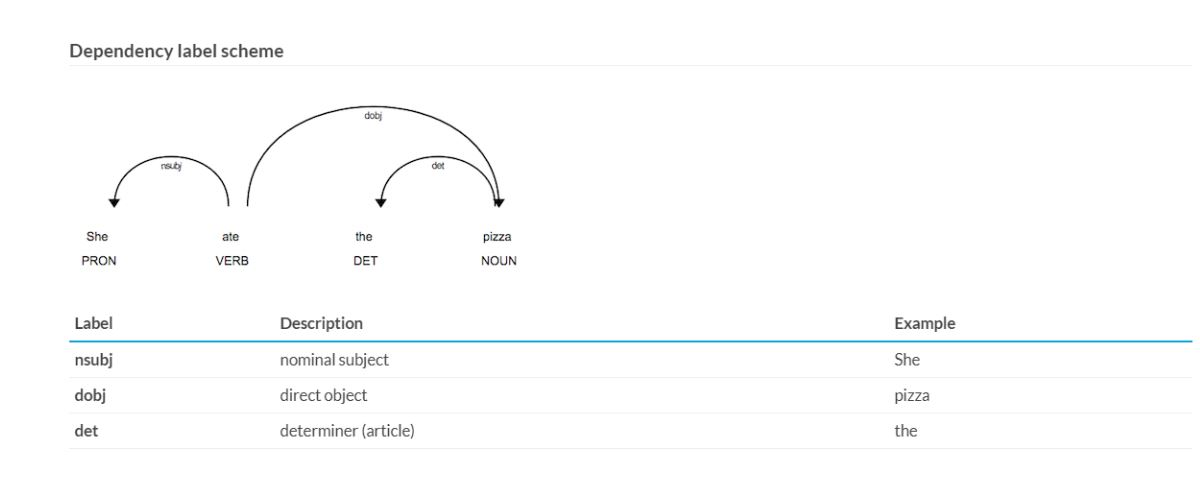

#### Predicting Named Entities

In [38]:
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [39]:
# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [40]:
# Get quick definitions of the most common tags and labels.
print(spacy.explain("GPE"))
print(spacy.explain("NNP"))
print(spacy.explain("dobj"))

Countries, cities, states
noun, proper singular
direct object


### 6: Model packages
Quiz

### 7: Loading models

The models we’re using in this course are already pre-installed. <br>
For more details on spaCy’s statistical models and how to install them on your machine, see the documentation.<br>
- Use ```spacy.load``` to load the small English model "en_core_web_sm".<br>
- Process the text and print the document text.

In [41]:
import spacy

# Load the "en_core_web_sm" model
nlp = spacy.load("en_core_web_sm")

In [42]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

In [43]:
# Process the text
doc = nlp(text)

In [44]:
# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value


### 8: Predicting linguistic annotations

You’ll now get to try one of spaCy’s pre-trained model packages and see its predictions in action. <br>
Feel free to try it out on your own text! <br>
To find out what a tag or label means, you can call spacy.explain in the loop. <br>
For example: spacy.explain("PROPN") or spacy.explain("GPE").

#### Part 1
---
Process the text with the nlp object and create a doc.<br>
For each token, print the token text, the token’s .pos_ (part-of-speech tag) and the token’s .dep_ (dependency label).

In [45]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [46]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

In [47]:
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

It          PRON      nsubj     
’s          VERB      ccomp     
official    ADJ       dobj      
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


#### Part 2
---
Process the text and create a doc object.<br>
Iterate over the doc.ents and print the entity text and label_ attribute.

In [48]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [49]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

In [50]:
# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


### 9: Predicting name entities in context

Models are statistical and not always right. <br>
Whether their predictions are correct depends on the training data and the text you’re processing. <br>
Let’s take a look at an example.<br>
- Process the text with the nlp object.<br>
- Iterate over the entities and print the entity text and label.<br>
- Looks like the model didn’t predict “iPhone X”. Create a span for those tokens manually.

In [51]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [52]:
text = "Upcoming iPhone X release date leaked as Apple reveals pre-orders"

# Process the text
doc = nlp(text)

In [53]:
# Iterate over the entities
for ent in doc.ents:
    # Print the entity text and label
    print(ent.text, ent.label_)

Upcoming iPhone X PERSON
Apple ORG


In [54]:
# Get the span for "iPhone X"
iphone_x = doc[1:3]

In [55]:
# Print the span text
print("Missing entity:", iphone_x.text)

Missing entity: iPhone X


### 10: Rule-based matching

Why not just regular expressions?<br>
- Match on Doc objects, not just strings<br>
- Match on tokens and token attributes<br>
- Use the model's predictions<br>
- Example: "duck" (verb) vs. "duck" (noun)

#### Match patterns
---
Lists of dictionaries, one per token<br>

Match exact token texts
- ```[{"TEXT": "iPhone"}, {"TEXT": "X"}]```<br>

Match lexical attributes
- ```[{"LOWER": "iphone"}, {"LOWER": "x"}]```<br>

Match any token attributes
- ```[{"LEMMA": "buy"}, {"POS": "NOUN"}]```

#### Using the Matcher (1)

In [56]:
import spacy

In [57]:
# Import the Matcher
from spacy.matcher import Matcher

In [58]:
# Load a model and create the nlp object
nlp = spacy.load("en_core_web_sm")

In [59]:
# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

In [60]:
# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", None, pattern)

In [61]:
# process some text
doc = nlp("Upcoming iPhone X release date leaked")

In [62]:
# Call the matcher on the doc
matches = matcher(doc)

#### Using the Matcher (2)

In [63]:
# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


match_id: hash value of the pattern name<br>
start: start index of matched span<br>
end: end index of matched span

#### Matching lexical attributes

In [64]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]

In [65]:
matcher = Matcher(nlp.vocab)
matcher.add("FIFA_PATTERN", None, pattern)
doc = nlp("2018 FIFA World Cup: France won!")

In [66]:
# Call the matcher on the doc
matches = matcher(doc)

In [67]:
# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

2018 FIFA World Cup:


In [68]:
# Matching other token attributes #
pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]

In [69]:
matcher = Matcher(nlp.vocab)
matcher.add("DOGS_CATS_PATTERN", None, pattern)
doc = nlp("I loved dogs but now I love cats more.")

In [70]:
matches = matcher(doc)

In [71]:
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

loved dogs
love cats


#### Using operators and quantifiers (1)

In [72]:
pattern = [
    {"LEMMA": "buy"},
    {"POS": "DET", "OP": "?"},  # optional: match 0 or 1 times
    {"POS": "NOUN"}
]

In [73]:
matcher = Matcher(nlp.vocab)
matcher.add("SMART_PHONE_PATTERN", None, pattern)
doc = nlp("I bought a smartphone. Now I'm buying apps.")
matches = matcher(doc)

In [74]:
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

bought a smartphone
buying apps


#### Using operators and quantifiers (2)
---
|Example|Description|
|-----|-----|
|{"OP": "!"}|Negation: match 0 times|
|{"OP": "?"}|Optional: match 0 or 1 times|
|{"OP": "+"}|Match 1 or more times|
|{"OP"; "*"}|Match 0 or more times|

### 11: Using the Matcher

Let’s try spaCy’s rule-based Matcher. 
You’ll be using the example from the previous exercise and write a pattern that can match the phrase “iPhone X” in the text.
- Import the Matcher from ```spacy.matcher```.
- Initialize it with the nlp object’s shared vocab.
- Create a pattern that matches the "TEXT" values of two tokens: "iPhone" and "X".
- Use the matcher.add method to add the pattern to the matcher.
- Call the matcher on the doc and store the result in the variable matches.
- Iterate over the matches and get the matched span from the start to the end index.

In [75]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

In [76]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Upcoming iPhone X release date leaked as Apple reveals pre-orders")

In [77]:
# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

In [78]:
# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{"TEXT":"iPhone"}, {"TEXT":"X"}]

In [79]:
# Add the pattern to the matcher
matcher.add("IPHONE_X_PATTERN", None, pattern)

In [80]:
# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


### 12: Writing match patterns

In this exercise, you’ll practice writing more complex match patterns using different token attributes and 
operators.

#### Part 1
---
Write one pattern that only matches mentions of the full iOS versions: “iOS 7”, “iOS 11” and “iOS 10”.

In [81]:
import spacy
from spacy.matcher import Matcher

In [82]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

In [83]:
doc = nlp(
    "After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper."
)

In [84]:
# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": "iOS"}, {"IS_DIGIT": True}]

In [85]:
# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

Total matches found: 3


In [86]:
# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


#### Part 2
---
Write one pattern that only matches forms of “download” (tokens with the lemma “download”), 
followed by a token with the part-of-speech tag "PROPN" (proper noun).

In [87]:
import spacy
from spacy.matcher import Matcher

In [88]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

In [89]:
doc = nlp(
    "i downloaded Fortnite on my laptop and can't open the game at all. Help? "
    "so when I was downloading Minecraft, I got the Windows version where it "
    "is the '.zip' folder and I used the default program to unpack it... do "
    "I also need to download Winzip?"
)

In [90]:
# Write a pattern that matches a form of "download" plus proper noun
pattern = [{"LEMMA": "download"}, {"POS": "PROPN"}]

In [91]:
# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

Total matches found: 2


In [92]:
# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Match found: downloaded Fortnite
Match found: downloading Minecraft


#### Part 3
---
Write one pattern that matches adjectives ("ADJ") followed by 
one or two "NOUN"s (one noun and one optional noun).

In [93]:
import spacy
from spacy.matcher import Matcher

In [94]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

In [95]:
doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

In [96]:
# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

In [97]:
# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

Total matches found: 5


In [98]:
# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses
